## **i. Mount google drive**
---

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **ii. Import the libraries**
---

In [ ]:
import cv2
import sys
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Versions of key libraries")
print("---")
print("cv2:       ", cv2.__version__)
print("numpy:     ", np.__version__)
print("matplotlib:", matplotlib.__version__)


Versions of key libraries
---
cv2:        4.1.2
numpy:      1.19.5
matplotlib: 3.2.2


## **iii. Append /iss/vse/data/ in your python path**
---

In [ ]:
sys.path.append('/content/gdrive/My Drive/iss/vse/data/')
print("All the system paths:")
sys.path

All the system paths:


['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/iss/vse/data/']

## **iv. Change working directory to /iss/vse/data/**
---

In [ ]:
os.chdir('/content/gdrive/My Drive/iss/vse/data/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/iss/vse/data'

## **v. Define `cv2plt` for image display**
---

In [ ]:
def cv2plt(img):
    plt.figure(figsize=(7,7))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

print(cv2plt)

<function cv2plt at 0x7f5dd80f67b8>


## **Question a**
---
Read in the image 'aria.jpg' and display the image

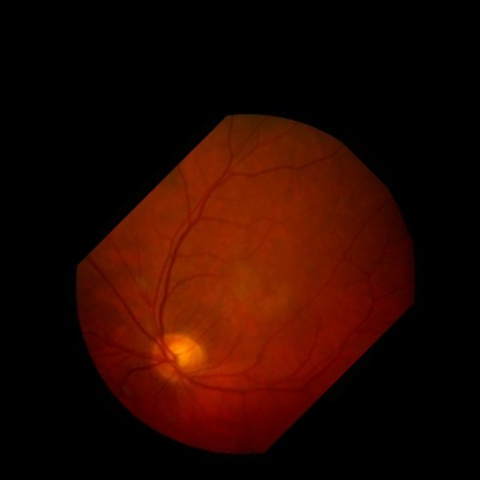

In [ ]:
# Type your code below
img = cv2.imread('aria.jpg')
cv2_imshow(img)


## **Question b**
---
Shift the image up by 50 pixels and show the output

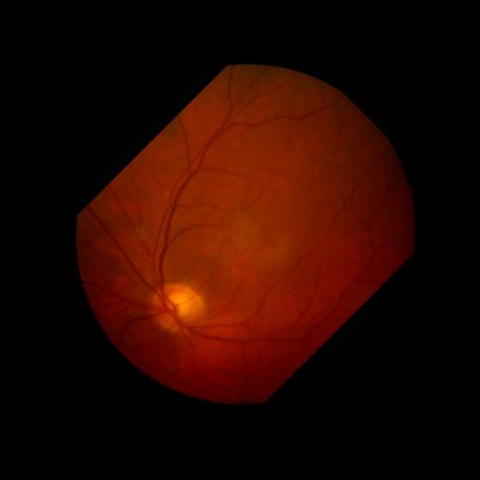

In [ ]:
# Type your code below
Mt = np.float32([[1, 0, 0],
                 [0, 1, -50]])
tr = cv2.warpAffine(img,Mt,(img.shape[0], img.shape[1]))
cv2_imshow(tr)

## **Question c**
---
Rotate the image by 45 degrees, clockwise with respect to the image center

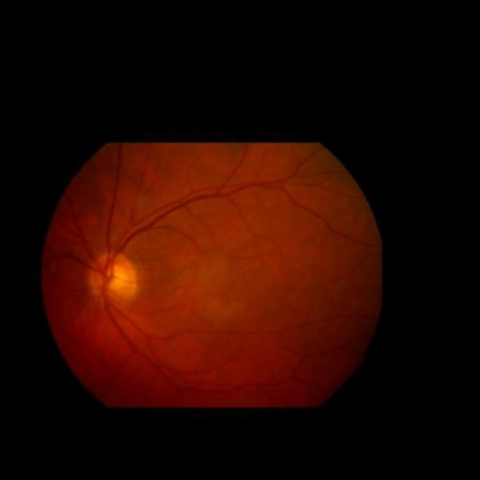

In [12]:
# Type your code below

(row,clm,_) = img.shape
Mr = cv2.getRotationMatrix2D((clm/2,row/2), -45 , 1)
rt = cv2.warpAffine(img, Mr, (row,clm))
cv2_imshow(rt)

## **Question d**
___
Create a mask that consists only of the retinal region. Run the code below to see the required output.

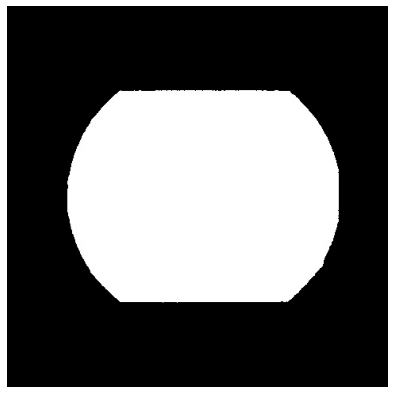

In [ ]:
cv2plt(cv2.imread('wks2_2_d.jpg'))


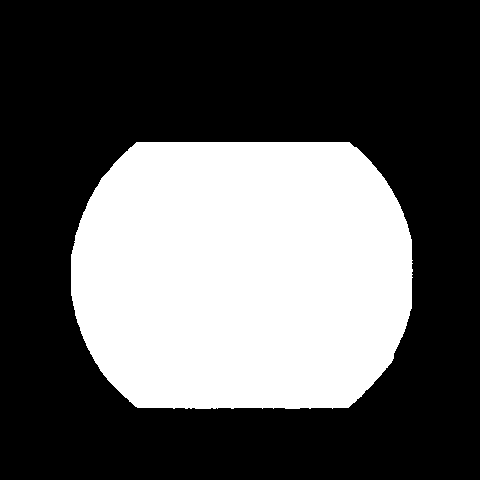

In [52]:
# Type your code below
#moving to the centre
Mt = np.float32([[1, 0, 30],
                 [0, 1, 0]])
tr = cv2.warpAffine(rt,Mt,(rt.shape[0], rt.shape[1]))
#cv2_imshow(tr)

# creating a threshold to create a mask
(_,thr) = cv2.threshold(tr[:, :, 2], 20, 255, cv2.THRESH_BINARY)
cv2_imshow(thr)




## **Question e**
---
Read in image 'neu.jpg' and create a mask that segments all the elements in the image. Run the code below to see the required output.

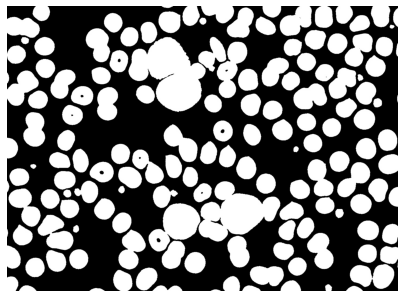

In [53]:
cv2plt(cv2.imread('wks2_2_e.jpg'))

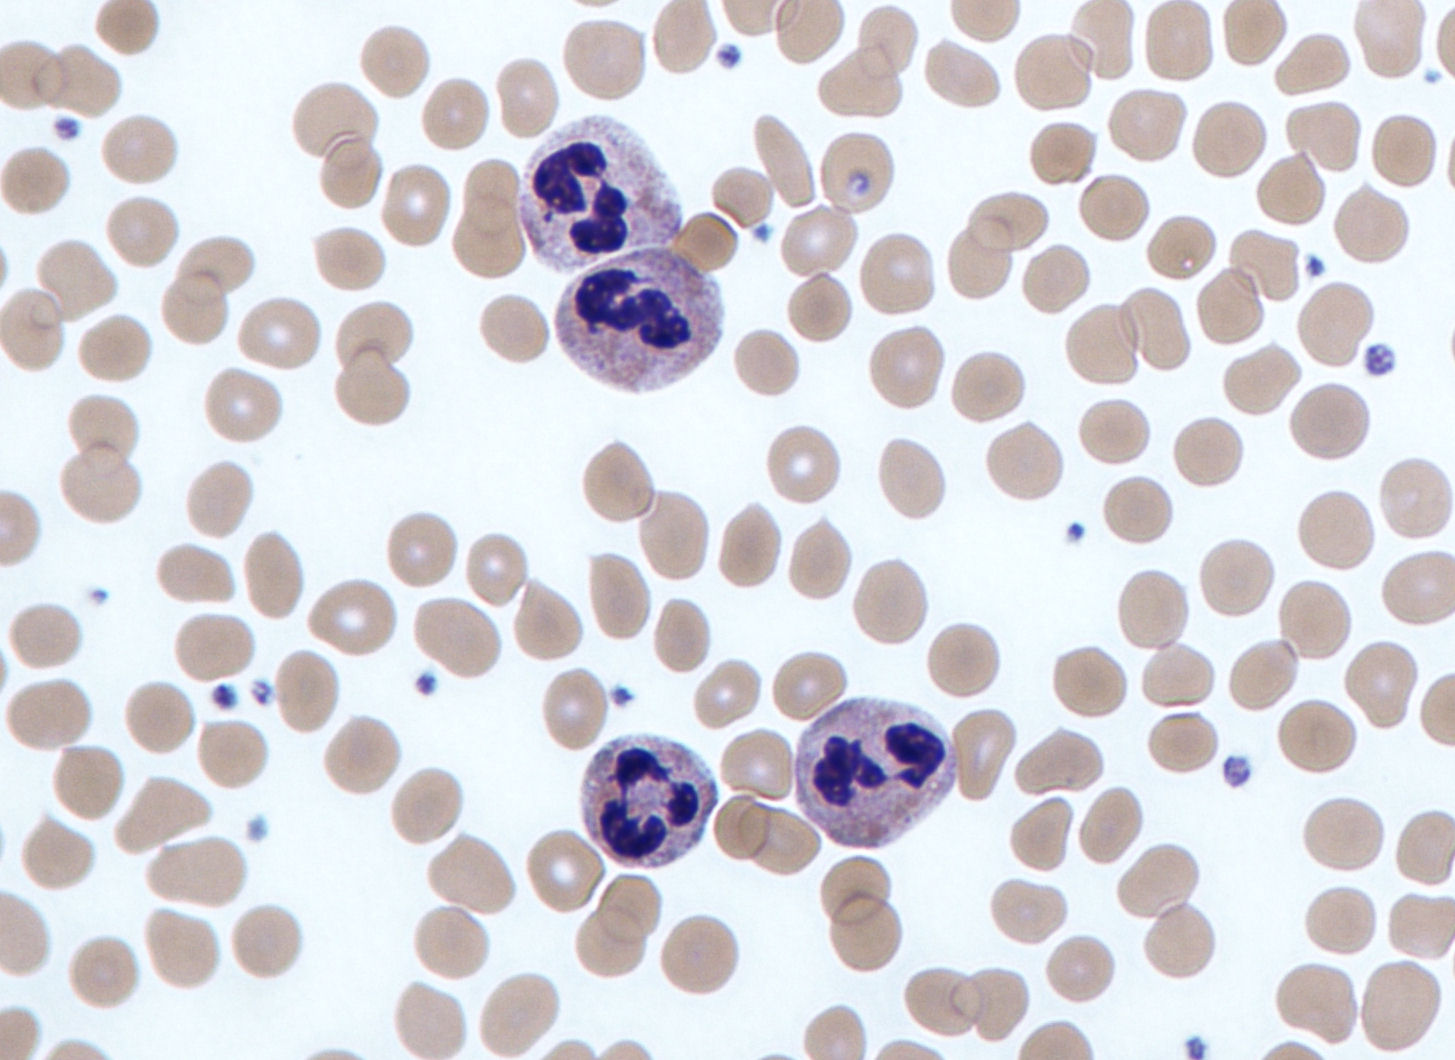

In [65]:
image = cv2.imread('neu.jpg')
cv2_imshow(image)


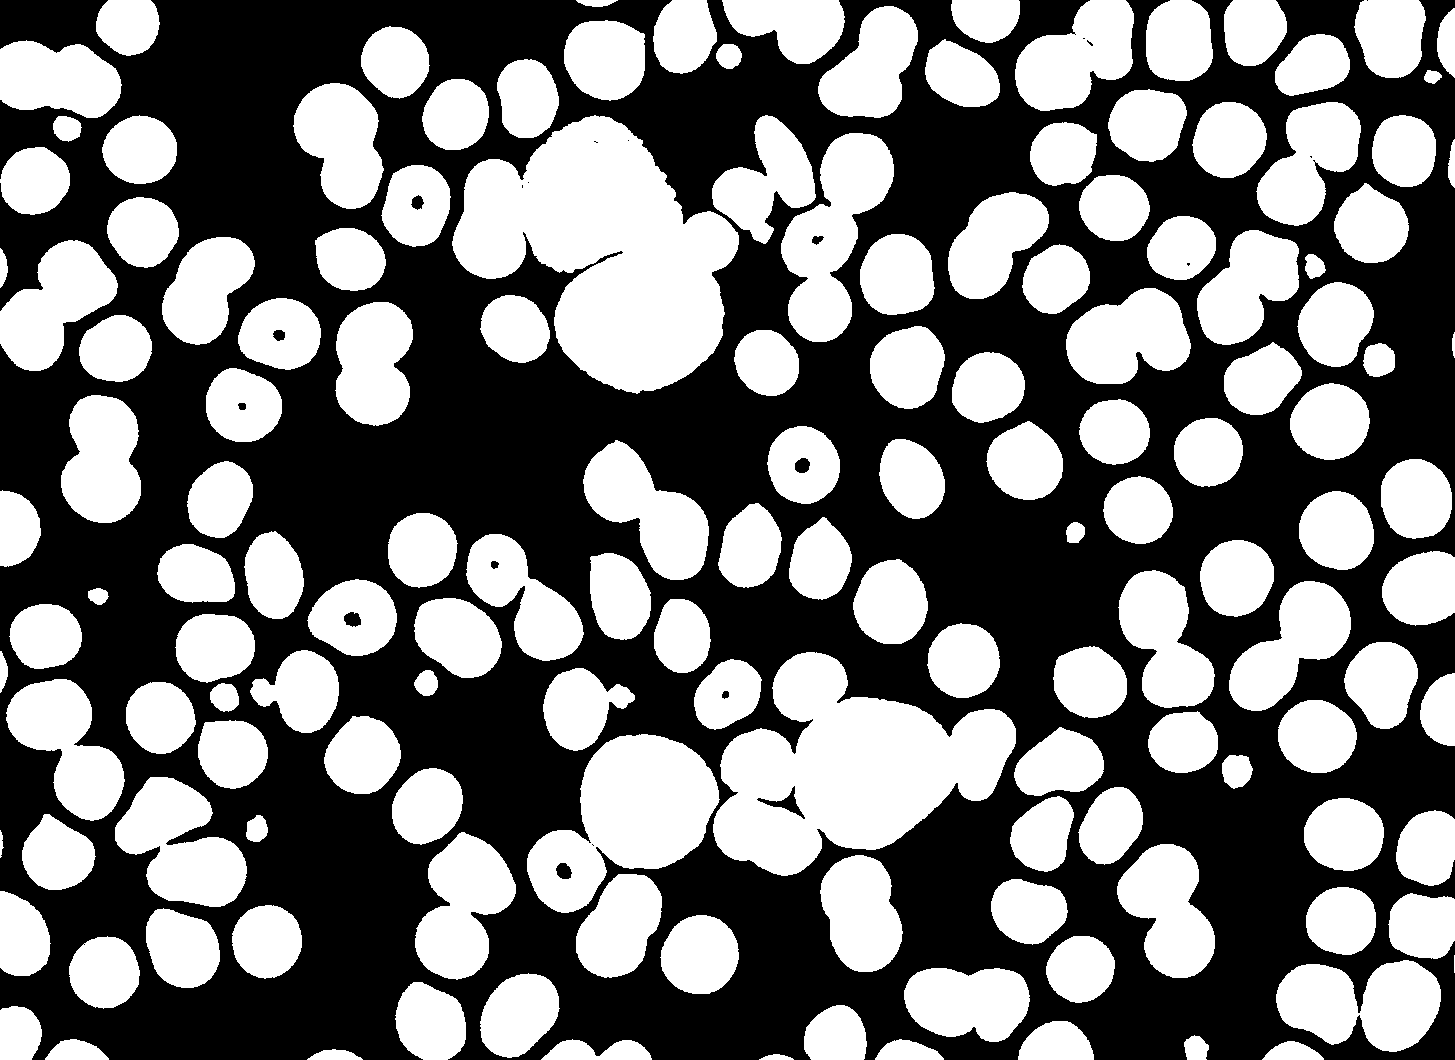

In [103]:

#grayscaling the image 
imgc = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#thresholding to get the mask
(_,thr) = cv2.threshold(imgc, 220, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thr)